<a href="https://colab.research.google.com/github/sezer17/Machine-Learning-Image-Recognition-Model/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CECS-456 Final Project


In [23]:
import os
import zipfile
import requests

# Define the download URL and paths
zip_url = 'https://drive.google.com/uc?id=1XJVwvn7Qso_uLAW8llioxLLwooUFN-9O'
zip_path = '/content/archive.zip'
extract_path = '/content/natural_images'

# Function to download the ZIP file
def download_file(url, destination):
    print("Downloading dataset...")
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully!")

# Download and extract the ZIP file
if not os.path.exists(zip_path):
    download_file(zip_url, zip_path)
else:
    print("Dataset already exists.")

if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted.")

# Verify the extracted files
print("Extracted files:", os.listdir(extract_path))

Dataset already exists.
Dataset already extracted.
Extracted files: ['airplane', 'person', 'motorbike', 'flower', 'cat', 'fruit', 'dog', 'car']


#Importing the libraries

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

#Loading and preprocessing the Dataset 1st Step


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values
    validation_split=0.2 # Split into training and validation sets
)

# Load Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    './natural_images',
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    './natural_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print Class Names
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.
Class names: ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


#Building the CNN Model Step 2

In [6]:
from tensorflow.keras import Input  # Import Input layer

model = Sequential()

# Define Input Layer explicitly
model.add(Input(shape=(128, 128, 3)))

# Add Convolutional and Pooling Layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Add Fully Connected Layers
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))  # 8 Classes for Natural Images

# Summary of the Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │      17,280,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,330,600 (66.11 MB)

 Trainable params: 17,330,600 (66.11 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model Step 3

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Since the labels are one-hot encoded
    metrics=['accuracy']
)

#Training the Model Step 4

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Change this for longer training
    verbose=1
)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.8867 - val_loss: 0.3894
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9063 - val_loss: 0.3824
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9107 - val_loss: 0.3717
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.9099 - val_loss: 0.3459
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9208 - val_loss: 0.3782
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 1.0000 - loss: 8.2201e-04 - val_accuracy: 0.9230 - val_loss: 0.3879
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 1.0000 - loss: 1.9200e-04 - val_accuracy: 0.9259 - val_loss: 0.3876
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 1.0000 - loss: 6.7294e-0

#Evaluating the Model Step 5


In [10]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - accuracy: 0.9252 - loss: 0.3522
Validation Loss: 0.4110
Validation Accuracy: 0.9274


# Visualizing Training and Validation Performance Step 6

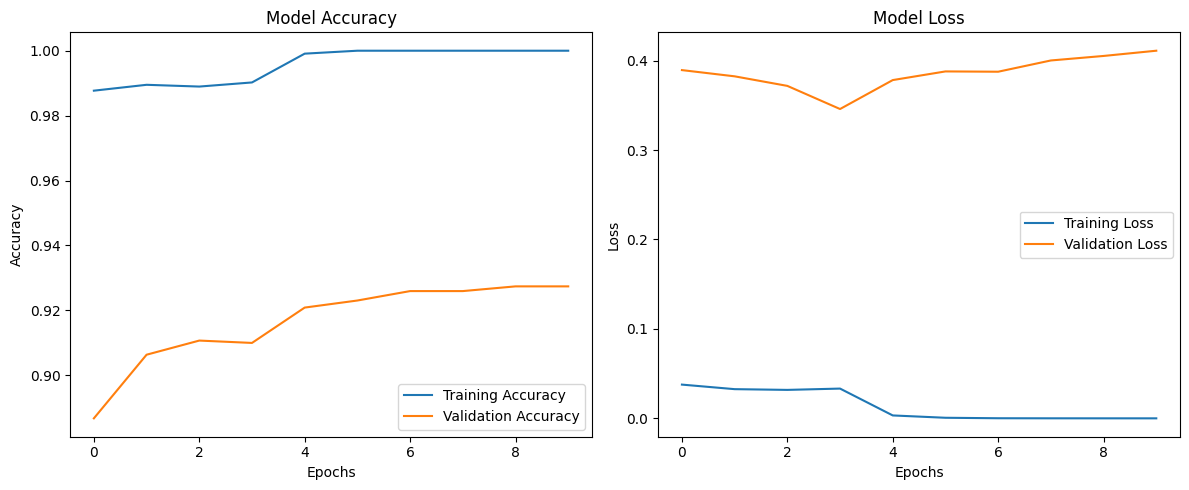

In [12]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predicting and Displaying images Step 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Labels: ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
Real Labels: ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


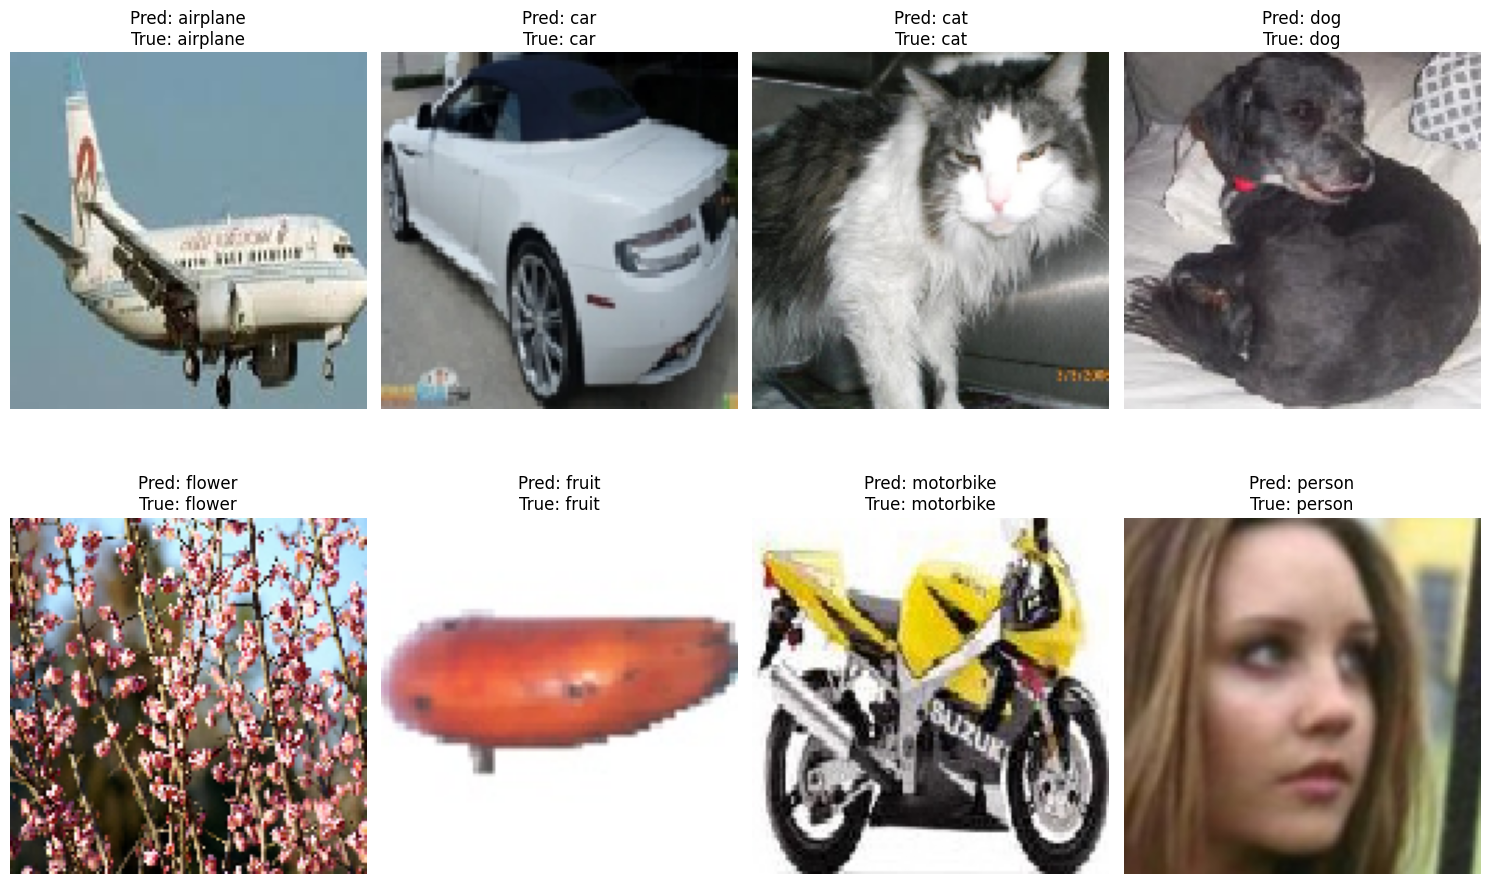

In [13]:
# Load one image from each folder category
images, labels = [], []  # Store selected images and their labels

# Loop through each class folder and select one image
for class_name in class_names:
    folder_path = os.path.join('./natural_images', class_name)
    image_file = os.listdir(folder_path)[0]  # Take the first image in the folder
    img_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = tf.keras.utils.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize the image
    images.append(img_array)
    labels.append(class_name)

# Convert the list of images to a numpy array
images = np.array(images)

# Get Predictions
predictions = model.predict(images)
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Print Predictions and Real Labels
print("Predicted Labels:", predicted_labels)
print("Real Labels:", labels)

# Visualize Images with Predictions
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()